# Import Libraries

In [1]:
# Your code to import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans


# Read File

In [2]:
# Your code to read file
df = pd.read_csv('Live.csv')

# Print the shape of the data. How many rows and columns are there?

In [3]:
# Your code to print the shape of the data
df.shape

(7050, 16)

# Preview the dataset

In [4]:
# Your code to preview the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


View summary of dataset


In [5]:
# Your code to print summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

# Check for missing values in dataset

In [6]:
# Your code to check missing value in the dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

#Drop redundant columns. Which columns are redundant?

In [7]:
# Your code to drop the drop the redundant colimns
for i in range(1,5):
    df=df.drop('Column'+str(i),axis=1)


# View summary of dataset

In [8]:
# Your code to print the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


# View the statistical summary of numerical variables. Use 'describe method'


In [9]:
# Your code to print the statistical summary of the dataset
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# There are 3 categorical variables in the dataset. We will explore them one by one.

# Explore status_id variable. Find the unique values of the column 'status_id'

In [10]:
# Your code to print the unique values of the variable 'status_id'

df['status_id'].unique()


array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

# View how many different types of variables are there

Based on the results, determine what you need to do with this column - 'Drop it' or 'Keep it'

In [11]:
# Your code to determine the number of different types of the variable
df['status_id'].value_counts()


status_id
819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: count, Length: 6997, dtype: int64

# Explore 'status_published' column and decide whether to drop or keep it.

In [12]:
# Your code to print the unique values of the variable 'statu_published'
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [13]:
# Your code to determine the number of different types of the variable
df['status_published'].value_counts()

status_published
3/20/2018 1:54     3
12/28/2017 8:09    2
4/30/2018 6:20     2
4/26/2018 19:00    2
4/23/2018 7:26     2
                  ..
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/7/2012 0:21      1
9/10/2016 10:30    1
Name: count, Length: 6913, dtype: int64

# Explore 'status_type' and decide whether to drop or keep it

In [14]:
# Your code to print the unique values of the variable 'status_type'
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [15]:
# Your code to determine the number of different types of the variable 'status_type'

df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [16]:
# Drop some variables, if necessary
df=df.drop(['status_id','status_published'],axis=1)

# After processing, print the summary of dataset again.

In [17]:
# Your code to print the summary of the dataset
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# Preview the dataset again

In [18]:
# Your code to preview the dataset
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# Declare feature vector and target variable

# Remember - We need only X for training the model. The y is normally unknown. However, we will use y for the testing the accuracy of the trained model.





In [19]:
X = df

y = df['status_type']

# Perform label encoding on the categorical data.

In [20]:
#
# Your code to perform the label encoding the X.
#

labelencoder = LabelEncoder()
X['status_type']=labelencoder.fit_transform(X['status_type'])
y = labelencoder.transform(y)

# View the brief info of the input X.

In [21]:
# Your code to view the brief info of the X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


# Preview the dataset

In [22]:
# Your code to preview the dataset
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Perfrom the feature scaling on X. Use MinMaxScaler

In [23]:
#
# Your code to perform the feature scaling on X
#
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# Develop KMean clustering using 2 clusters.

## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [24]:
#
# Your code to implement KMeans algorithm
#
from sklearn.cluster import KMeans
kmeansmodel = KMeans(n_clusters=2,n_init=10)
clusters = kmeansmodel.fit_predict(X)

# Print the cluster centers.

In [25]:
# Your code to print the cluster centers
print(clusters)

[0 1 0 ... 1 1 1]


# Print the intertia.

In [26]:
# Your code to print the inertia
print(kmeansmodel.inertia_)


237.75726404419538


# Check the number of samples correctly classified.

In [27]:
labels = kmeansmodel.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


# Check the accuracy of the KMean.

In [28]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Accuracy score: 0.61


# Run KMeans for different cluster center numers 1-10 and plot inertia.

In [29]:
#
# Your code to run K-Mean for k = 1-10 and plot number of clusters vs inertia results.
inertia_list=[]
kvalues=range (1,11)
clusters=(1,11)
for k in kvalues:
    kmeansmodel = KMeans(n_clusters=k,n_init=10)
    clusters = kmeansmodel.fit_predict(X)    
    inertia_list.append(kmeansmodel.inertia_)

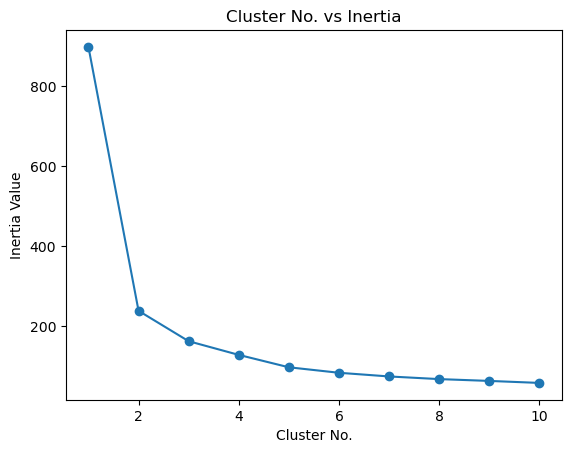

In [30]:
plt.plot(kvalues,inertia_list, marker='o')
plt.title('Cluster No. vs Inertia')
plt.xlabel('Cluster No.')
plt.ylabel('Inertia Value')
plt.show()

# Develop the KMeans for K= 3 and check accuracy

In [31]:
#
# Implement the KMeans for K=3 and check accuracy
#
kmeansmodel = KMeans(n_clusters=3,random_state=2,n_init=10)
clusters = kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
correct_labels = sum(y == labels)
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.62


# Develop the KMean for k=4 and check accuracy.

In [32]:
#
# Implement the Kmeans for K=4 and check accuracy
#
kmeansmodel = KMeans(n_clusters=4,random_state=80,n_init=10)
clusters = kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
correct_labels = sum(y == labels)
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Accuracy score: 0.89


In [33]:
accuracy_list=[]
clusters=(1,11)
for k in range (1,11):
    kmeansmodel = KMeans(n_clusters=k,random_state=80,n_init=10)
    clusters = kmeansmodel.fit_predict(X)
    correct_labels = sum(y == kmeansmodel.labels_)
    accuracy_list.append(round(correct_labels/float(y.size)*100,2))

[0.89, 0.89, 1.99, 89.19, 3.84, 58.64, 57.87, 24.04, 0.7, 0.77]


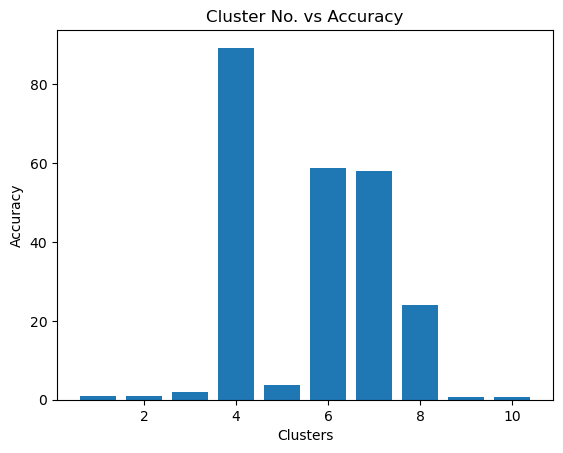

In [34]:
print(accuracy_list)
plt.bar(kvalues,accuracy_list)
plt.title('Cluster No. vs Accuracy')
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.show()

# **Lab Logbook requirement:** Document in your lab logbook, the optimal number of clusters for this problem.